In [2]:
print(2)

2


In [1]:
import numpy as np

vector

In [5]:
np.array((1 , 2, 2))

array([1, 2, 2])

sub_vector  , Block or stacked vectors

In [2]:
a = [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]]
result = [x[1:4] for x in a[0:1]]
print(result)


[[2, 3, 4]]


Indexing

In [6]:
a[1][1:3] , a[0][2]

([7, 8], 3)

Zero vectors

In [21]:
np.zeros(((2 , 3 , 1 )))

array([[[0.],
        [0.],
        [0.]],

       [[0.],
        [0.],
        [0.]]])

Ones Vector

In [25]:
np.ones((2 , 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

(standard) unit vector

In [24]:
def unit_vector(i , n):
       #create a vector of zeros of size n
       e = np.zeros(n)
       #set ith element to 1
       e[i-1] = 1
       return e

e_unit = unit_vector(2 , 3)
print(e_unit)

[0. 1. 0.]


Sparsity : nnz(x)  The number of the nonzero entries

In [6]:
np.count_nonzero([1,0,2,0,0,0,0,3,0,0,0,0,0,0])

3

In [12]:
test_list = [1,0,0,0,3,0,0,1,0,0,2]
sparsity_pattern = np.nonzero(test_list)
print(test_list)
print(sparsity_pattern[0])

[1, 0, 0, 0, 3, 0, 0, 1, 0, 0, 2]
[ 0  4  7 10]


Image in array format (Gray-Scale Array to Image Conversion)

In [4]:
from PIL import Image
# import numpy as np

In [9]:
# open the Image
img_file = Image.open("p.jpg")

#convert img to gray-scale(8-bit)
img_gray = img_file.convert("L") #or "1"

#Display the gray scale img
img_gray.show()

#convert gray img to a Numpy array:
grayScale_array = np.array(img_gray)
# Now `grayscale_array` contains the pixel values as a 2D array
grayScale_array

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [10]:
#convert th Numpy array back to an img object
restored_img = Image.fromarray(grayScale_array)
restored_img.show()

Word count and histogram + word cloud

In [32]:
import nltk

#for stemming words
from nltk.stem import WordNetLemmatizer

#split a given text into individual words (tokens)
from nltk.tokenize import RegexpTokenizer 

#for counting objects
from collections import Counter

import matplotlib.pyplot as plt

from wordcloud import WordCloud


In [20]:
#sample text :
text = "Dostoevsky's literary works explore the human condition in the troubled political, social, and spiritual atmospheres of 19th-century Russia, and engage with a variety of philosophical and religious themes. His most acclaimed novels include Crime and Punishment (1866), The Idiot (1869), Demons (1872), and The Brothers Karamazov (1880). His 1864 novella Notes from Underground is considered to be one of the first works of existentialist literature"


In [25]:

# download necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [26]:
#Initialize a tokenizer 
tokenizer = RegexpTokenizer(r'\w+')

# tokenize the text
tokens = tokenizer.tokenize(text)

# create a Stemmer object(initialize a lemmatizer)
lemmatizer = WordNetLemmatizer()

#stem the tokens (lemmatize)
lemmas = [ lemmatizer.lemmatize(token) 
         for token in tokens]

#count the frequency of each stem (lemma)
lemma_counts = Counter(lemmas)

lemma_counts

Counter({'and': 5,
         'of': 4,
         'the': 3,
         'work': 2,
         'His': 2,
         'The': 2,
         'Dostoevsky': 1,
         's': 1,
         'literary': 1,
         'explore': 1,
         'human': 1,
         'condition': 1,
         'in': 1,
         'troubled': 1,
         'political': 1,
         'social': 1,
         'spiritual': 1,
         'atmosphere': 1,
         '19th': 1,
         'century': 1,
         'Russia': 1,
         'engage': 1,
         'with': 1,
         'a': 1,
         'variety': 1,
         'philosophical': 1,
         'religious': 1,
         'theme': 1,
         'most': 1,
         'acclaimed': 1,
         'novel': 1,
         'include': 1,
         'Crime': 1,
         'Punishment': 1,
         '1866': 1,
         'Idiot': 1,
         '1869': 1,
         'Demons': 1,
         '1872': 1,
         'Brothers': 1,
         'Karamazov': 1,
         '1880': 1,
         '1864': 1,
         'novella': 1,
         'Notes': 1,
         'from':

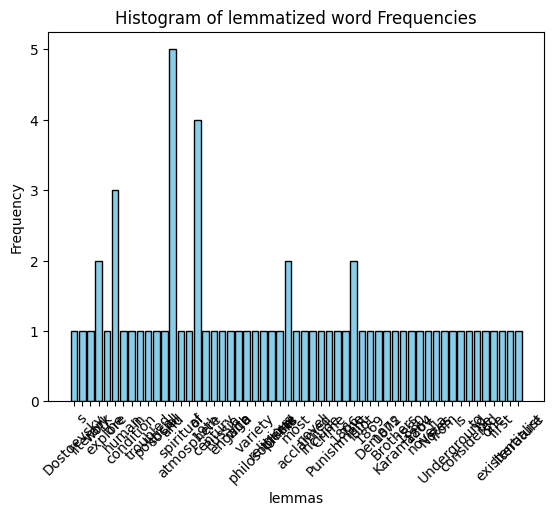

In [28]:
#plot the histogram:
plt.bar(lemma_counts.keys() , lemma_counts.values() , 
        color = 'skyblue', edgecolor = 'black')
plt.xlabel('lemmas')
plt.ylabel('Frequency')
plt.title('Histogram of lemmatized word Frequencies')
plt.xticks(rotation = 45)
plt.show()

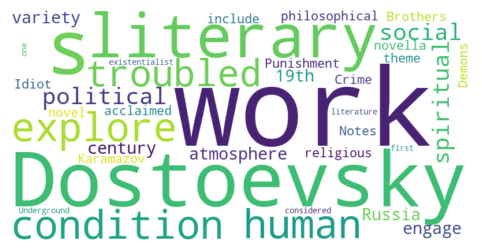

In [35]:
#create the word cloud

# join the lemmas int a single string
lemmas_text = ' '.join(lemmas)

wordcloud = WordCloud(width=800 , height=400,
       background_color='white').generate(lemmas_text)

#display wordcloud

plt.figure(figsize=(10 , 3))
plt.imshow(wordcloud , interpolation= 'bilinear')
plt.axis('off')
plt.show()
